# Exploratory Data Analysis and Machine Learning Classification on Iris Species

Hello. In this notebook, I did a Visualization and Machine Learning study on the Iris Types Data Set. I performed Data Analysis on the dataset using visualization tools. At the end of the notebook, I performed Dimensionality Reduction using PCA and LDA. I hope it will be useful.

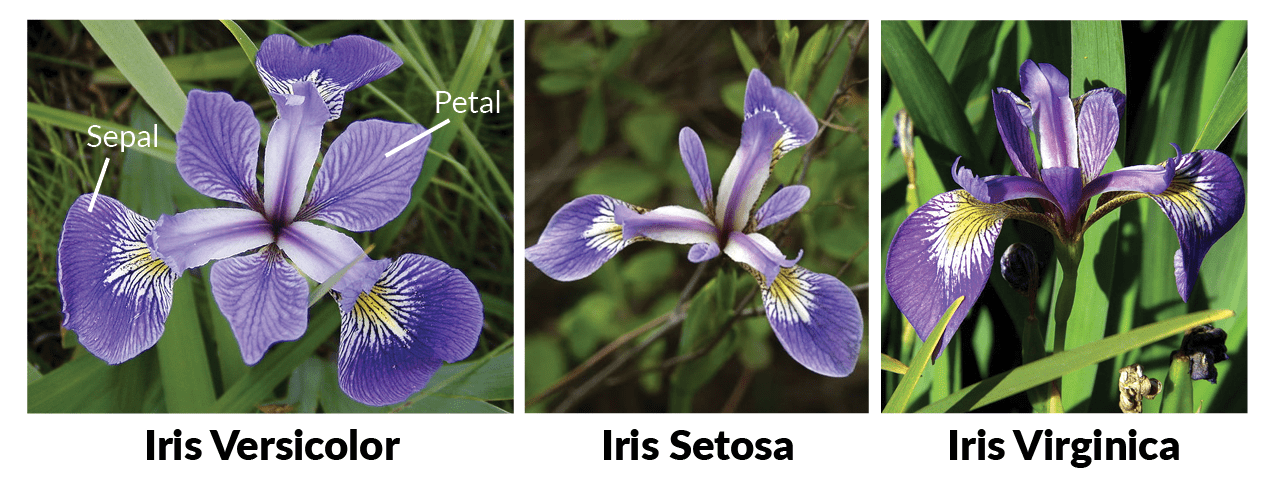

Source: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

### If you have questions please ask them on the comment section.

### I will be glad if you can give feedback.

Content:

1. [Importing the Necessary Libraries](#1)
1. [Read Datas & Explanation of Features & Information About Datasets](#2)
   1. [Variable Descriptions](#3)
   1. [Univariate Variable Analysis](#4)
      1. [Categorical Variables](#5)
      1. [Numerical Variables](#6)
1. [Correlation](#7)
1. [Data Visualization](#8)
1. [Pandas Profiling](#9)
1. [Train-Test Split](#10)
1. [Scores of Models](#11)
1. [Best Features Selection](#12)
1. [Dimensionality Reduction](#13)
   1. [Principle Component Analysis (PCA)](#14)
   1. [Linear Discriminant Analysis (LDA)](#15)
1. [Conclusion](#16)      

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


<a id="1"></a> 
# Importing the Necessary Libraries

In [2]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

<a id="2"></a> 
# Read Datas & Explanation of Features & Information About Datasets

In [3]:
dataset = pandas.read_csv('/kaggle/input/iris/Iris.csv')
dataset.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
12,13,4.8,3.0,1.4,0.1,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
84,85,5.4,3.0,4.5,1.5,Iris-versicolor


I dropped 'id' column because it can cause unwanted correlation.

In [4]:
dataset.drop("Id", axis=1, inplace=True)

<a id="3"></a> 
## Variable Descriptions

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<a id="4"></a> 
## Univariate Variable Analysis

<a id="5"></a> 
### Categorical Variables

In [6]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [7]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['Species']


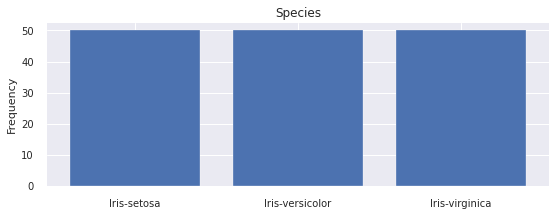

Species:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [8]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

<a id="6"></a> 
### Numerical Variables

In [9]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

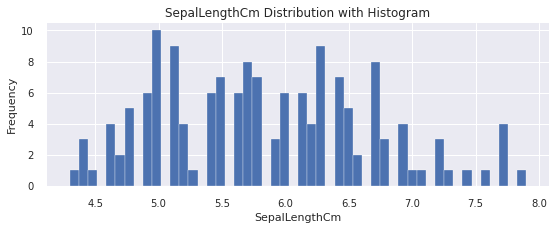

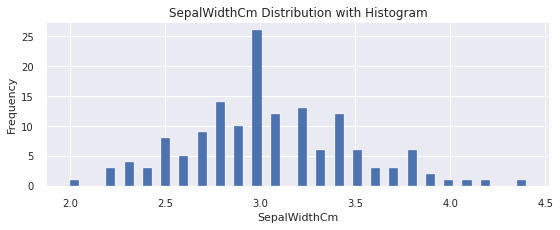

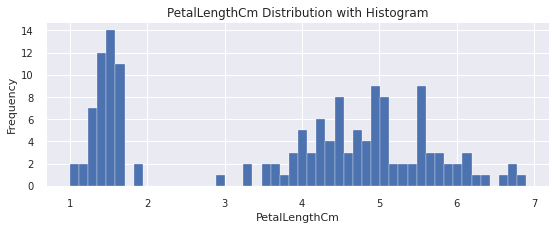

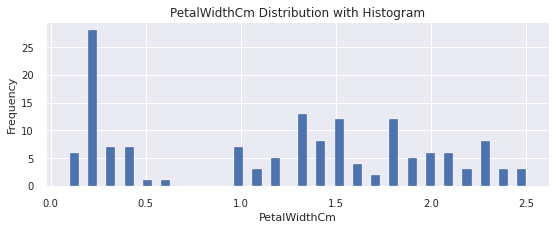

In [11]:
for n in numerical_float64_list:
    plot_hist(n)

Text(0.5, 1.0, 'PetalWidthCm Interval and Counts')

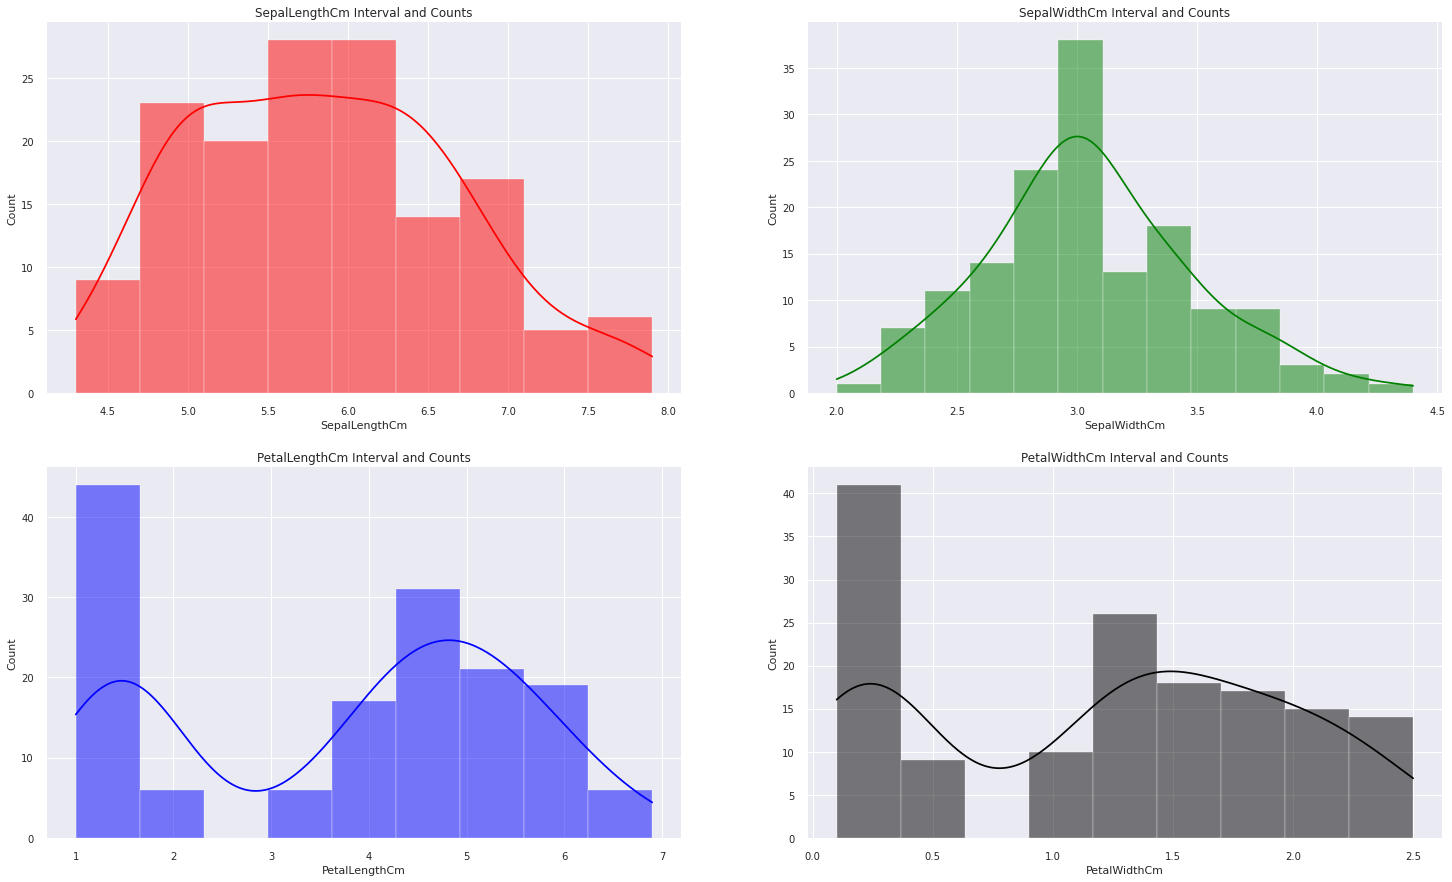

In [12]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(dataset['SepalLengthCm'], color = 'red', kde = True).set_title('SepalLengthCm Interval and Counts')

plt.subplot(2,2,2)
sns.histplot(dataset['SepalWidthCm'], color = 'green', kde = True).set_title('SepalWidthCm Interval and Counts')

plt.subplot(2,2,3)
sns.histplot(dataset['PetalLengthCm'], kde = True, color = 'blue').set_title('PetalLengthCm Interval and Counts')

plt.subplot(2,2,4)
sns.histplot(dataset['PetalWidthCm'], kde = True, color = 'black').set_title('PetalWidthCm Interval and Counts')

<a id="7"></a> 
# Correlation

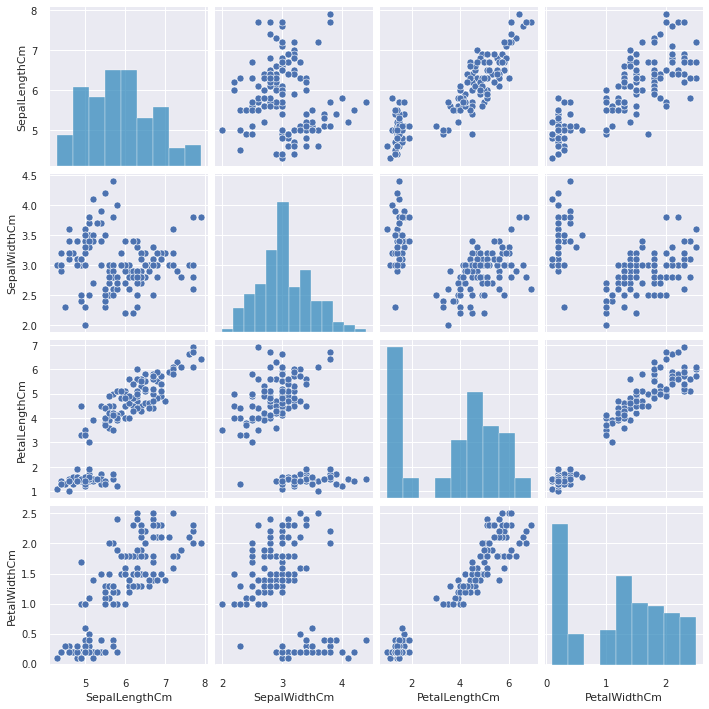

In [13]:
features = dataset.columns
sns.set_style('darkgrid')
sns.pairplot(dataset[features])

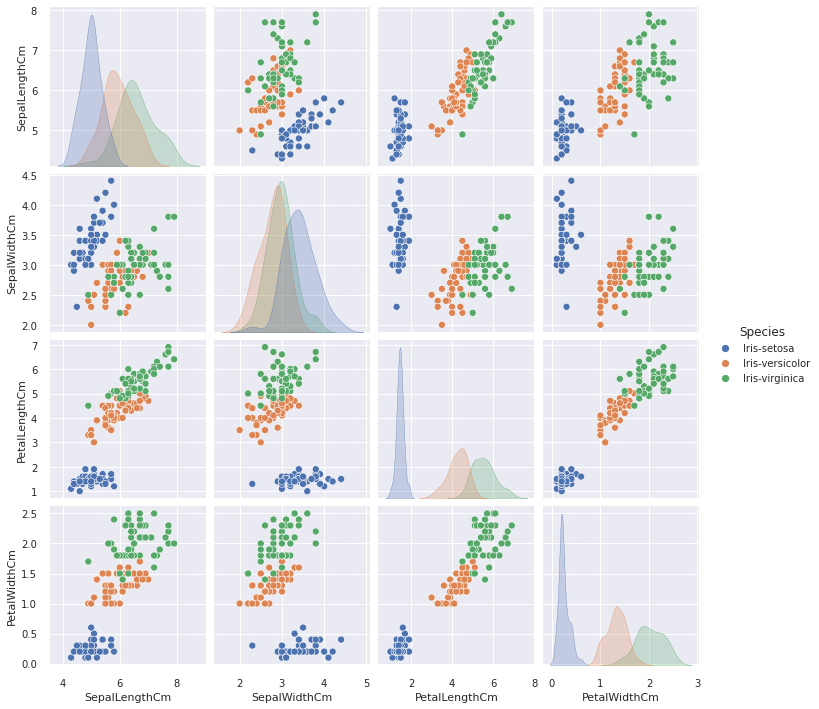

In [14]:
sns.pairplot(dataset, hue = 'Species')

In [15]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


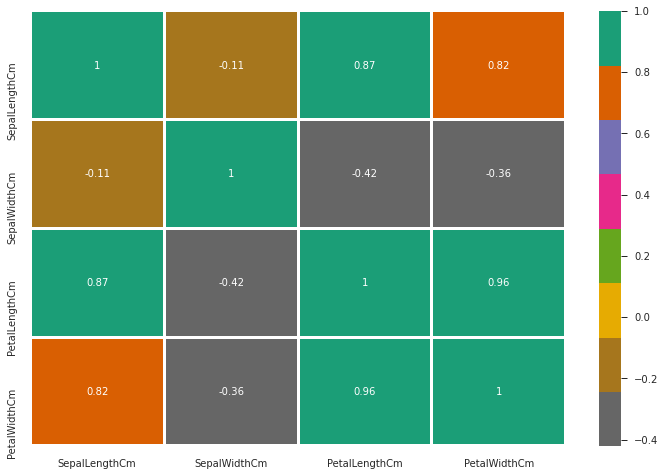

In [16]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

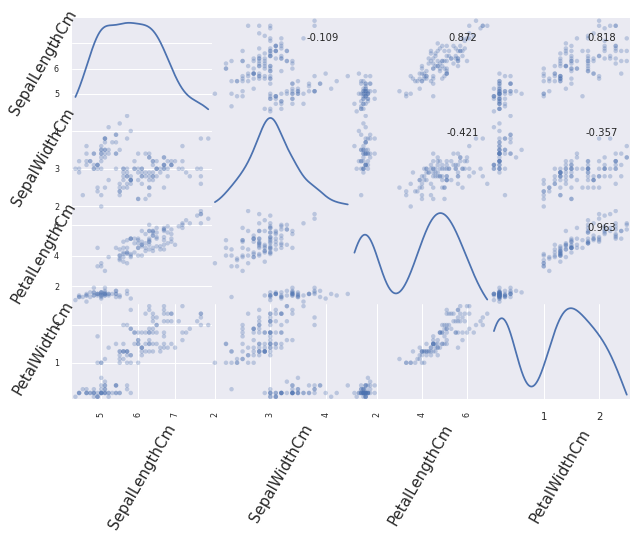

In [17]:
sns.set_style('darkgrid')
axes = pandas.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (10,7), diagonal = 'kde' ,s=80)
corr = dataset.corr().values

plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)
# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")

<a id="8"></a> 
# Data Visualization

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

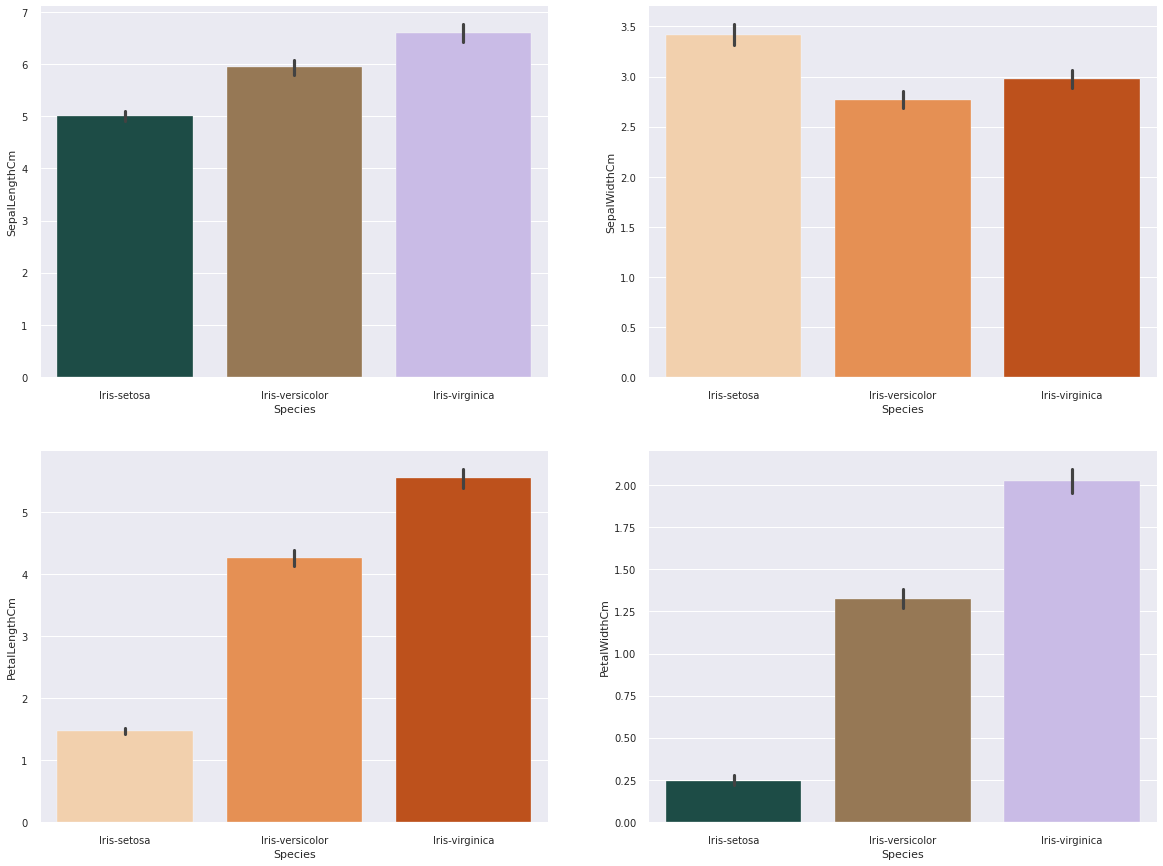

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = dataset, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = dataset, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = dataset, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = dataset, palette="cubehelix")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

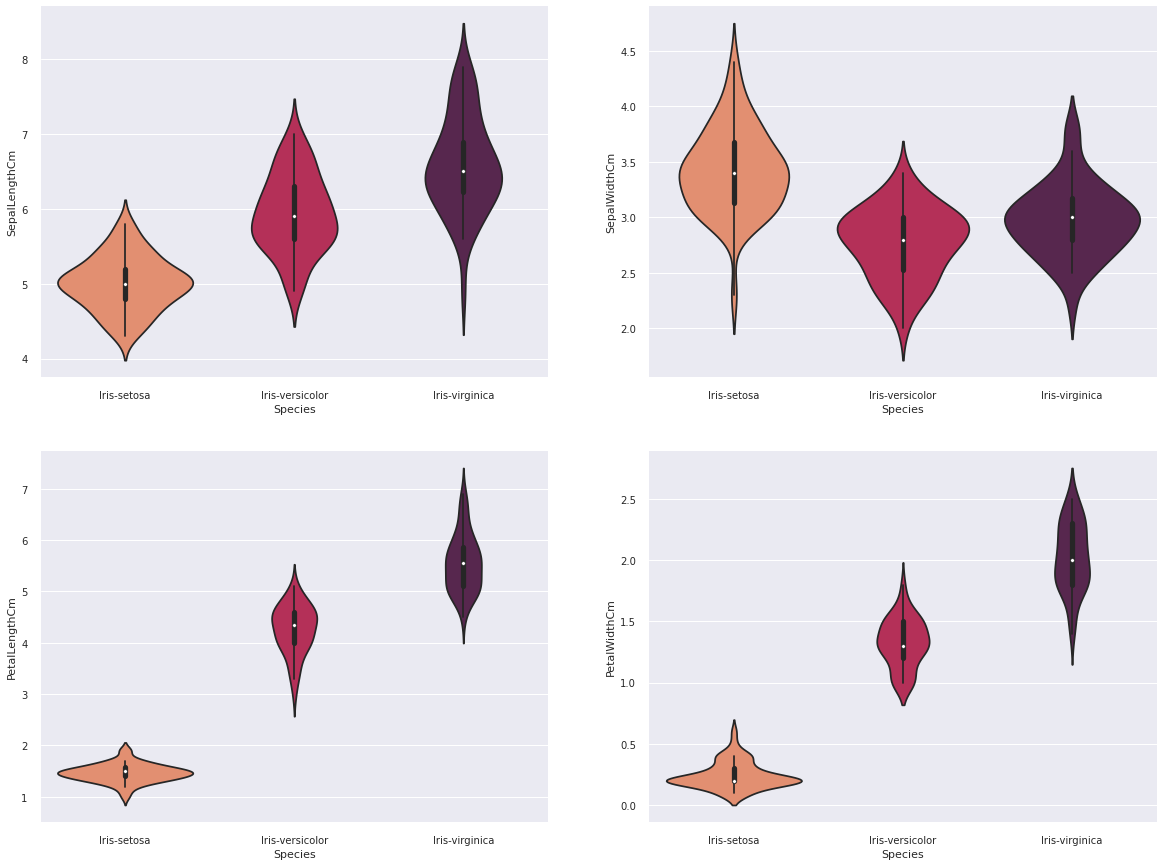

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = dataset, palette="rocket_r")
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = dataset, palette="rocket_r")
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = dataset, palette="rocket_r")
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = dataset, palette="rocket_r")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

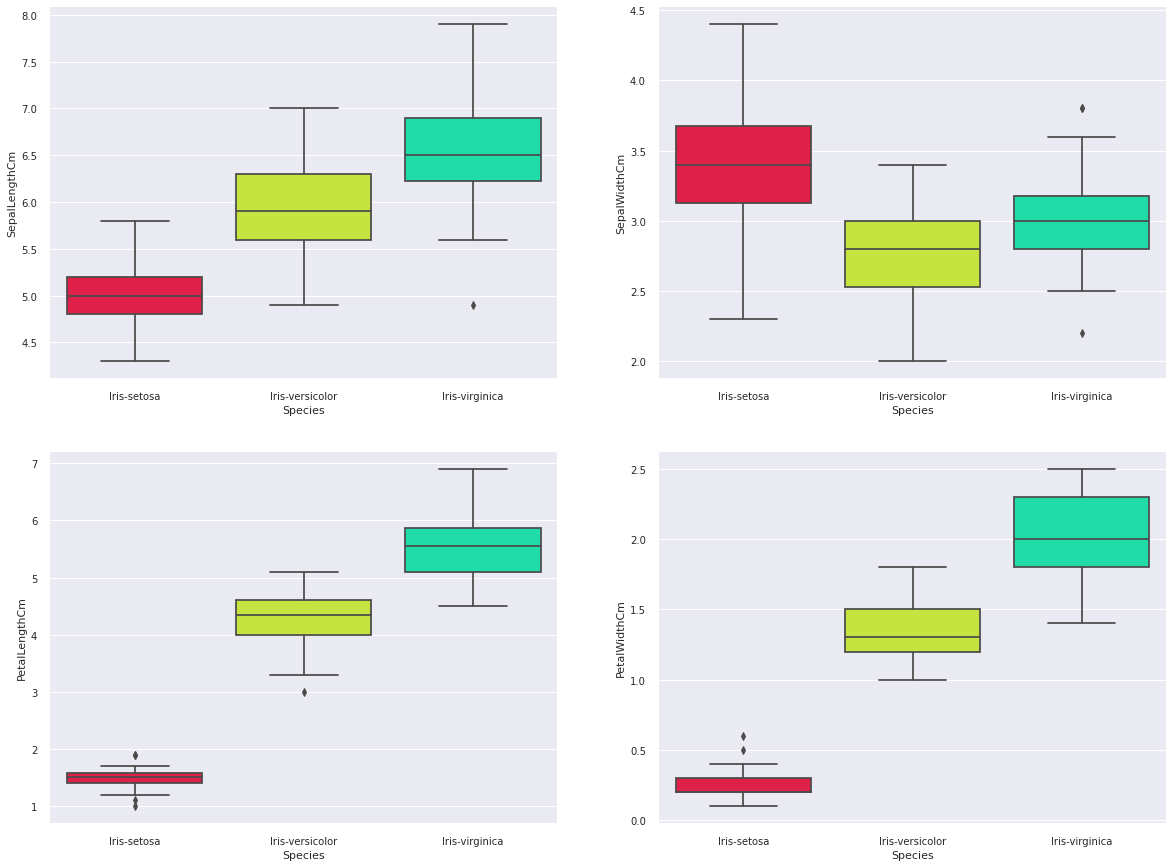

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = dataset, palette="gist_ncar_r")
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = dataset, palette="gist_ncar_r")
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = dataset, palette="gist_ncar_r")
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = dataset, palette="gist_ncar_r")

Text(0.5, 1.0, 'PetalWidth Interval')

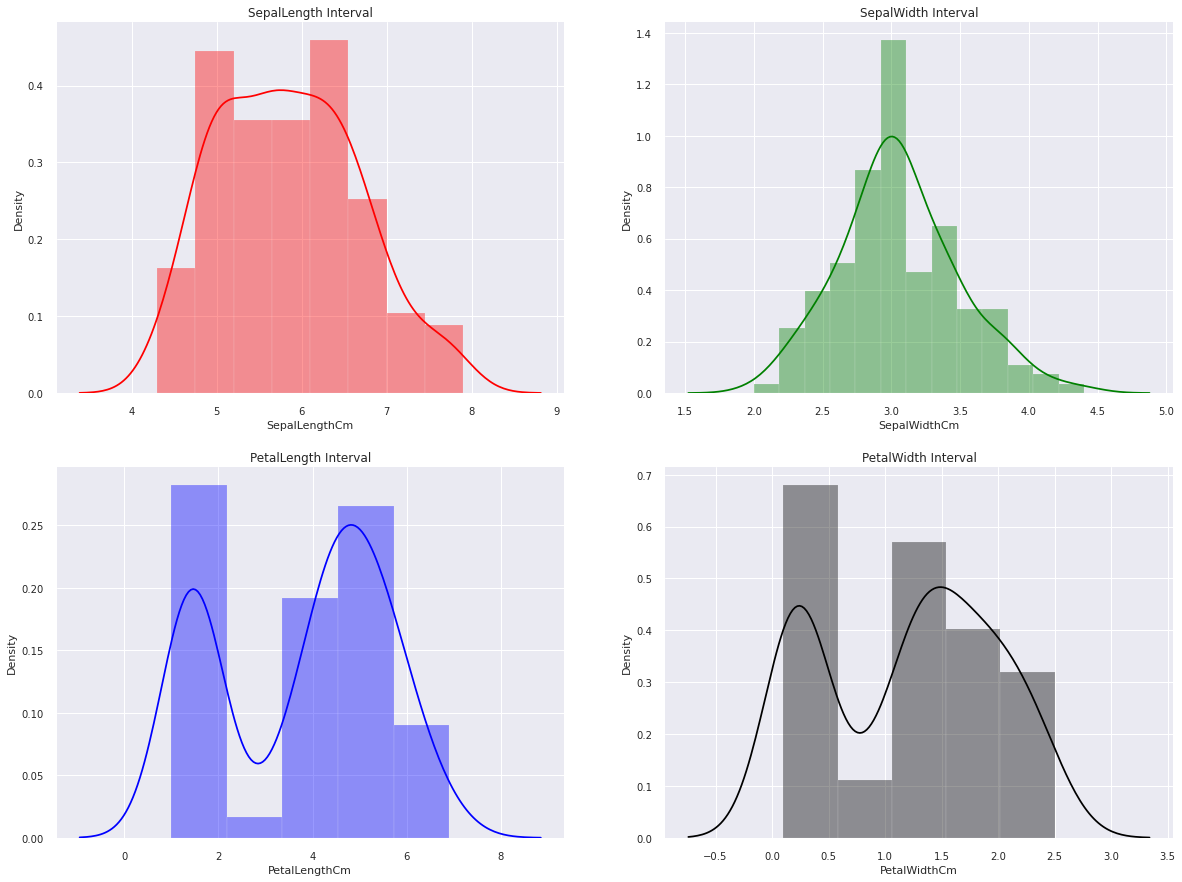

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(dataset['SepalLengthCm'], color="red").set_title('SepalLength Interval')
plt.subplot(2,2,2)
sns.distplot(dataset['SepalWidthCm'], color="green").set_title('SepalWidth Interval')
plt.subplot(2,2,3)
sns.distplot(dataset['PetalLengthCm'], color="blue").set_title('PetalLength Interval')
plt.subplot(2,2,4)
sns.distplot(dataset['PetalWidthCm'], color="black").set_title('PetalWidth Interval')

<AxesSubplot:title={'center':'Distribution of Species'}, ylabel='Species'>

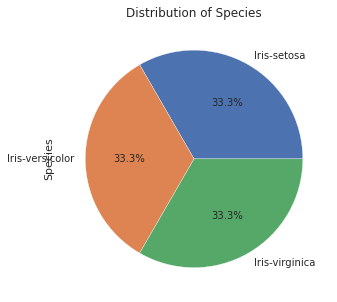

In [22]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Species")
dataset['Species'].value_counts().plot.pie(autopct="%1.1f%%")

<a id="9"></a> 
# Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [23]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="10"></a> 
# Train - Test Split

In [24]:
X = dataset.iloc[:,0:4].values 
y = dataset.iloc[:,4:].values 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 150
Total # of sample in train dataset: 100
Total # of sample in validation dataset: 25
Total # of sample in test dataset: 25


Standardization is a method in which the mean value is 0 and the standard deviation is 1, and the distribution approaches the normal. The formula is as follows, we subtract the average value from the value we have, then divide it by the variance value.

In [26]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="11"></a> 
# Scores of Models

These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [27]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 96.0
Validation score of trained model: 16.0
Test score of trained model: 96.0
 
Confussion Matrix: 
[[ 5  0  0]
 [ 0 11  1]
 [ 0  0  8]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        25
      macro avg       0.96      0.97      0.97        25
   weighted avg       0.96      0.96      0.96        25



############################################################################



BernoulliNB
Train score of trained model: 75.0
Validation score of trained model: 16.0
Test score of trained model: 76.0
 
Confussion Matrix: 
[[5 1 0]
 [0 5 0]
 [0 5 9]]

Accuracy : 0.9090909090909091
Precision: 0.8333333333333334
R

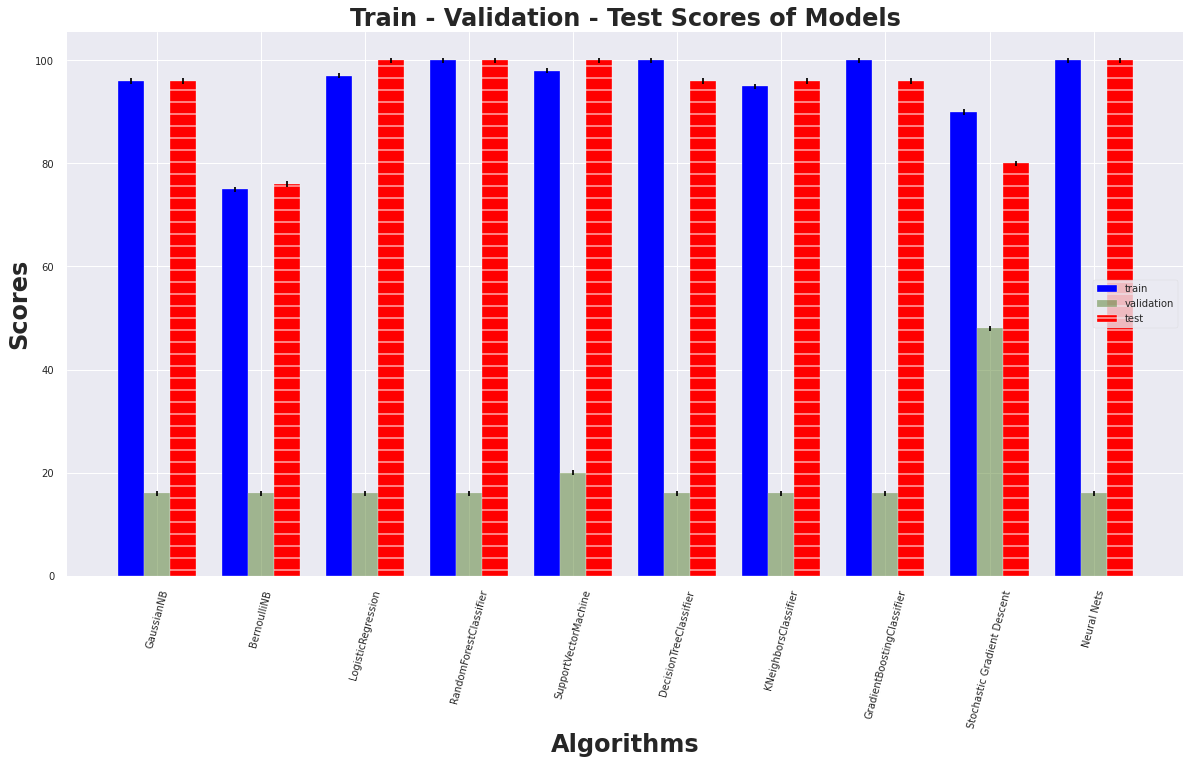

In [28]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [29]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 96.0
Accuracy of BernoulliNB -----> 76.0
Accuracy of LogisticRegression -----> 100.0
Accuracy of RandomForestClassifier -----> 100.0
Accuracy of SupportVectorMachine -----> 100.0
Accuracy of DecisionTreeClassifier -----> 96.0
Accuracy of KNeighborsClassifier -----> 96.0
Accuracy of GradientBoostingClassifier -----> 96.0
Accuracy of Stochastic Gradient Descent -----> 80.0
Accuracy of Neural Nets -----> 100.0


<a id="12"></a>
# Best Features Selection

In [30]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (150, 4) New shape: (150, 4)


LogisticRegression
Old Shape: (150, 4) New shape: (150, 2)


RandomForestClassifier
Old Shape: (150, 4) New shape: (150, 2)


DecisionTreeClassifier
Old Shape: (150, 4) New shape: (150, 1)


GradientBoostingClassifier
Old Shape: (150, 4) New shape: (150, 2)


Stochastic Gradient Descent
Old Shape: (150, 4) New shape: (150, 3)




<a id="13"></a>
# Dimensionality Reduction

In data science, dimension reduction is the transformation of data from a high dimensional space to a low dimensional space without losing its meaning. Processing a high-dimensional data requires more processing load. Therefore, dimension reduction is frequently used in areas such as signal processing, speech recognition, neuroinformatics, and bioinformatics, where a large number of observations and variables are examined.

<a id="14"></a>
## Principle Component Analysis (PCA)

PCA is a useful statistical technique used in the fields of recognition, classification, and image compression. It is a technique whose main purpose is to keep the data set with the highest variance in high dimensional data, but to provide dimension reduction while doing this. By finding general features in multi-dimensional data, it enables the reduction of the number of dimensions and the compression of the data. Certain features will be lost with size reduction; but the intention is that these lost traits contain little information about the population. This method combines highly correlated variables together to create a smaller set of artificial variables called principal components that make up the most variation in the data.

PCA is a very effective method for revealing the necessary information in the data. The basic logic behind PCA is to show a multidimensional data with fewer variables by capturing the basic features in the data.

(150, 2)


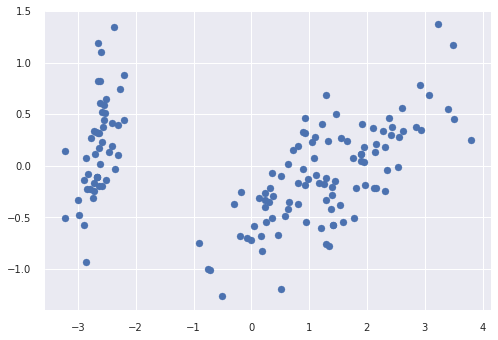

In [31]:
from sklearn.decomposition import PCA
selectedX = X[:,]

pcaX = PCA(n_components=2)
pcaX = pcaX.fit(selectedX)
pcaX = pcaX.transform(X)
print(pcaX.shape)

plt.scatter(pcaX[:,0], pcaX[:,1])
plt.show()

<a id="15"></a>
## Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis is used as a dimension reduction technique in preprocessing stage for machine learning applications. The goal is to prevent overfitting and at the same time reduce computational costs. Although LDA is generally similar to PCA, the working logic of LDA includes maximizing the distance between classes. There is no class concept in PCA. PCA only tries to maximize the distance between data points.

In summary, the aim of LDA is to reduce the size of the data set by maximizing the difference between classes.

(150, 2)


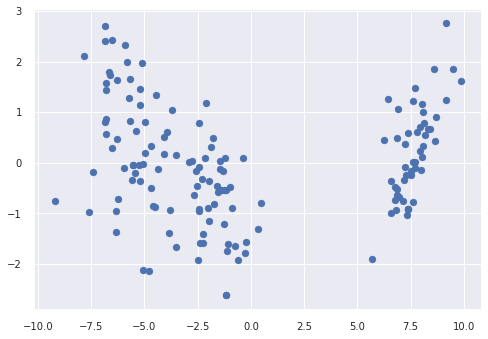

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldaX = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
print(ldaX.shape)

plt.scatter(ldaX[:,0], ldaX[:,1])
plt.show()

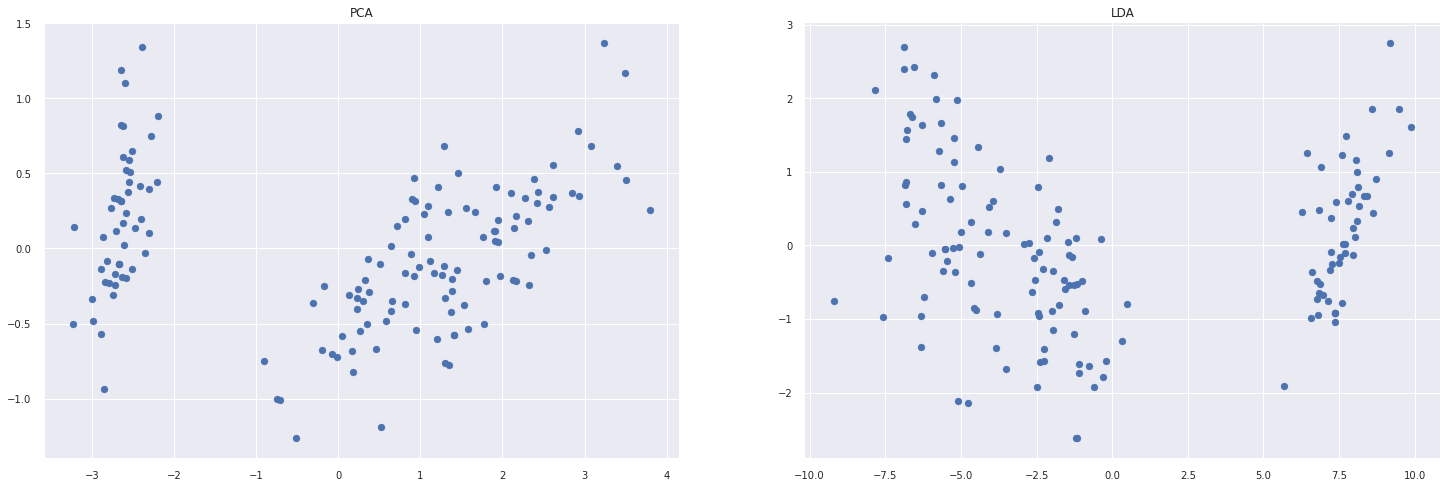

In [33]:
ldaX = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
pcaX = PCA(n_components=2).fit_transform(X, y)


plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('PCA')
plt.scatter(pcaX[:,0], pcaX[:, 1])

plt.subplot(1,2,2)
plt.title('LDA')
plt.scatter(ldaX[:,0], ldaX[:, 1])


plt.show()

<a id="16"></a> 
# Conclusion

In this notebook, I examined Iris Species Dataset. Firstly, I made Exploratory Data Analysis, Visualization, then I applied Machine Learning algorithms to this dataset. 

* If you have questions, please comment them. I will try to explain if you don't understand.
* If you liked this notebook, please let me know :)


* ***Thank you for your time.***